In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sci
from scipy import interpolate
from astropy.table import Table
'''t = Table.read('/Users/tusharkantidas/NIUS/Temp/lte014-3.5-0.0.BT-Settl.7.dat.xml')
#print(t)
from astropy.io.votable import parse_single_table
table = parse_single_table('/Users/tusharkantidas/NIUS/Temp/lte014-3.5-0.0.BT-Settl.7.dat.xml')
#print(table)'''

#data = table.array

"t = Table.read('/Users/tusharkantidas/NIUS/Temp/lte014-3.5-0.0.BT-Settl.7.dat.xml')\n#print(t)\nfrom astropy.io.votable import parse_single_table\ntable = parse_single_table('/Users/tusharkantidas/NIUS/Temp/lte014-3.5-0.0.BT-Settl.7.dat.xml')\n#print(table)"

In [2]:
from jupyterthemes import jtplot
jtplot.style()

In [5]:
%matplotlib notebook

In [4]:
# Lambda_0 = 5000 Angstrom
# Refering Liu and Bouvier
lambda_o = 5000  # # # This is the confusion. What are we supposed to take this lambda not.
inclination = (np.pi)/6         # in radian
c = sci.constants.c # speed of light
G = sci.constants.G        #gravitational constant
M_star = 10**30    # mass of proto-star in consideration
R = 10**7         # Radius
M_s = M_star
v_kep = (G*M_s/R)**0.5      # in metres per second
print('v keplerian: {} in metres per sec'.format(v_kep))
np.sin(inclination)/(c) * v_kep
lambda_max =  (lambda_o * np.sin(inclination))/(c) * v_kep
print('lambda max: ',lambda_max)

#finding initial sampling rate of the data
trimmed_data = np.extract(data['WAVELENGTH']>3000,data)
trimmed_data = np.extract(trimmed_data['WAVELENGTH']<50000,trimmed_data)
print(trimmed_data[0],trimmed_data[-1])
# Sampling rate at Lambda not 
trim_dta = np.extract(trimmed_data['WAVELENGTH']>(lambda_o-lambda_max),trimmed_data)
trim_dta = np.extract(trim_dta['WAVELENGTH']<(lambda_o+lambda_max),trim_dta)
trim_dta
print('Sampling rate at lambda_0: ',len(trim_dta))
#sampling at initial lambda
trim_dta_2 = np.extract(trimmed_data['WAVELENGTH']<(trimmed_data['WAVELENGTH'][0]+(2*lambda_max)),trimmed_data)
#print(trim_dta_2)
print(len(trim_dta_2))
print('Initial Sampling rate at lambda_i: ',len(trim_dta_2))
#sampling at final lambda
trim_dta_3 = np.extract(trimmed_data['WAVELENGTH']>(trimmed_data['WAVELENGTH'][-1]-(2*lambda_max)),trimmed_data)
trim_dta_3
print('Initial Sampling rate at lambda_f: ',len(trim_dta_3))

v keplerian: 2583466.6632259837 in metres per sec
lambda max:  21.543792999839102


NameError: name 'data' is not defined

In [14]:
print('kernel width: {}'.format(lambda_max*2))
#Writing the kernel
#x_inter
para_1 = lambda_o-lambda_max
para_2 = lambda_o+lambda_max
para_3 = len(trim_dta_2)
print(para_1, para_2, para_3)
ax = np.linspace(para_1,para_2,para_3,False)
y_ker = (1-((ax-lambda_o)/lambda_max)**2)**(-0.5)
y_ker = np.ma.masked_invalid(y_ker)
y_ker = np.ma.filled(y_ker, 0)
ax=np.delete(ax,0)
y_ker=np.delete(y_ker,0)
#plt.plot(ax,y_ker,)
# y_ker.count()
w = np.count_nonzero(y_ker)
#print(y_ker[0])
# normalise the kernel
final_kernel = y_ker/np.sum(y_ker)
plt.plot(ax,final_kernel)

kernel width: 1.7763379562298358
4999.111831021885 5000.888168978115 36


In [15]:
final_kernel

array([0.06369286, 0.04569517, 0.03787104, 0.03330579, 0.03026627,
       0.02808591, 0.02644702, 0.02517681, 0.0241725 , 0.02336889,
       0.02272262, 0.02220386, 0.0217916 , 0.02147086, 0.02123095,
       0.02106443, 0.02096638, 0.020934  , 0.02096638, 0.02106443,
       0.02123095, 0.02147086, 0.0217916 , 0.02220386, 0.02272262,
       0.02336889, 0.0241725 , 0.02517681, 0.02644702, 0.02808591,
       0.03026627, 0.03330579, 0.03787104, 0.04569517, 0.06369286])

In [21]:
convolved_curve = np.convolve(new_y, final_kernel, mode='same')

In [17]:
trim_x = np.extract(data['WAVELENGTH']>3000,data['WAVELENGTH'])
trim_x = np.extract(trim_x<50000,trim_x)
#print(trim_x[0],trim_x[-1])
x_dash = trim_x

trim_y = np.extract(data['WAVELENGTH']>3000,data['FLUX'])
trim_y = np.extract(trim_x<50000,trim_y)
#print(trim_y[0],trim_y[-1])
y_dash = trim_y

diff_in_wave = [0]
for i in range(len(x_dash)-1):
    diff_dash = x_dash[i+1]-x_dash[i]
    diff_in_wave.append(diff_dash)
#print(diff_wavelength_dash)
print(len(diff_in_wave))
plt.plot(x_dash,np.log10(diff_in_wave))
diff_in_wave[-1]


420050


/var/folders/57/5kj1j9cj2lb94mn77v2nv4200000gn/T/ipykernel_10895/488961906.py:17: RuntimeWarning: divide by zero encountered in log10
  plt.plot(x_dash,np.log10(diff_in_wave))


0.19921875

In [18]:
#define a new linspace
len(diff_in_wave)
new_difference = np.linspace(diff_in_wave[0],0.223755,len(diff_in_wave)) # the final value how to approach in proper method
#plt.plot(x,wave_dash)
#wave_dash
print(new_difference)
cumsumm = [0]

for i in range(len(new_difference)):
    xx = new_difference[i] + cumsumm[-1]
    cumsumm.append(xx)
#cf = np.cumsum(new_difference)
#print(cumsumm)
'''x_new = [3000]
for i in range(len(cf)-1):
    new_ele =  cf[i] - x_new[-1]
    x_new.append(new_ele)
len(x_new)
x_new[-1]'''
#new_x = np.linspace(3000,50000,420051)
#plt.plot(new_x,cf)
cf = []
for i in range(len(diff_in_wave)):
    cs = 3000 + cumsumm[i]
    cf.append(cs)
diff_in_wave[-3]
cf[-1]

[0.00000000e+00 5.32687853e-07 1.06537571e-06 ... 2.23753935e-01
 2.23754467e-01 2.23755000e-01]


49993.92012000001

In [20]:
# interpolate with a fixed function throughout
cf
y_dash
f = interpolate.interp1d(x_dash,y_dash)
x_after_inter = np.linspace(3000.1,49999.00,len(diff_in_wave))
new_y = f(x_after_inter)



In [22]:
plt.plot(np.log10(x_dash),np.log10(y_dash),'b',np.log10(x_after_inter),np.log10(new_y),'r')

In [12]:
convolved_curve = np.convolve(new_y, final_kernel, mode='same')

<IPython.core.display.Javascript object>


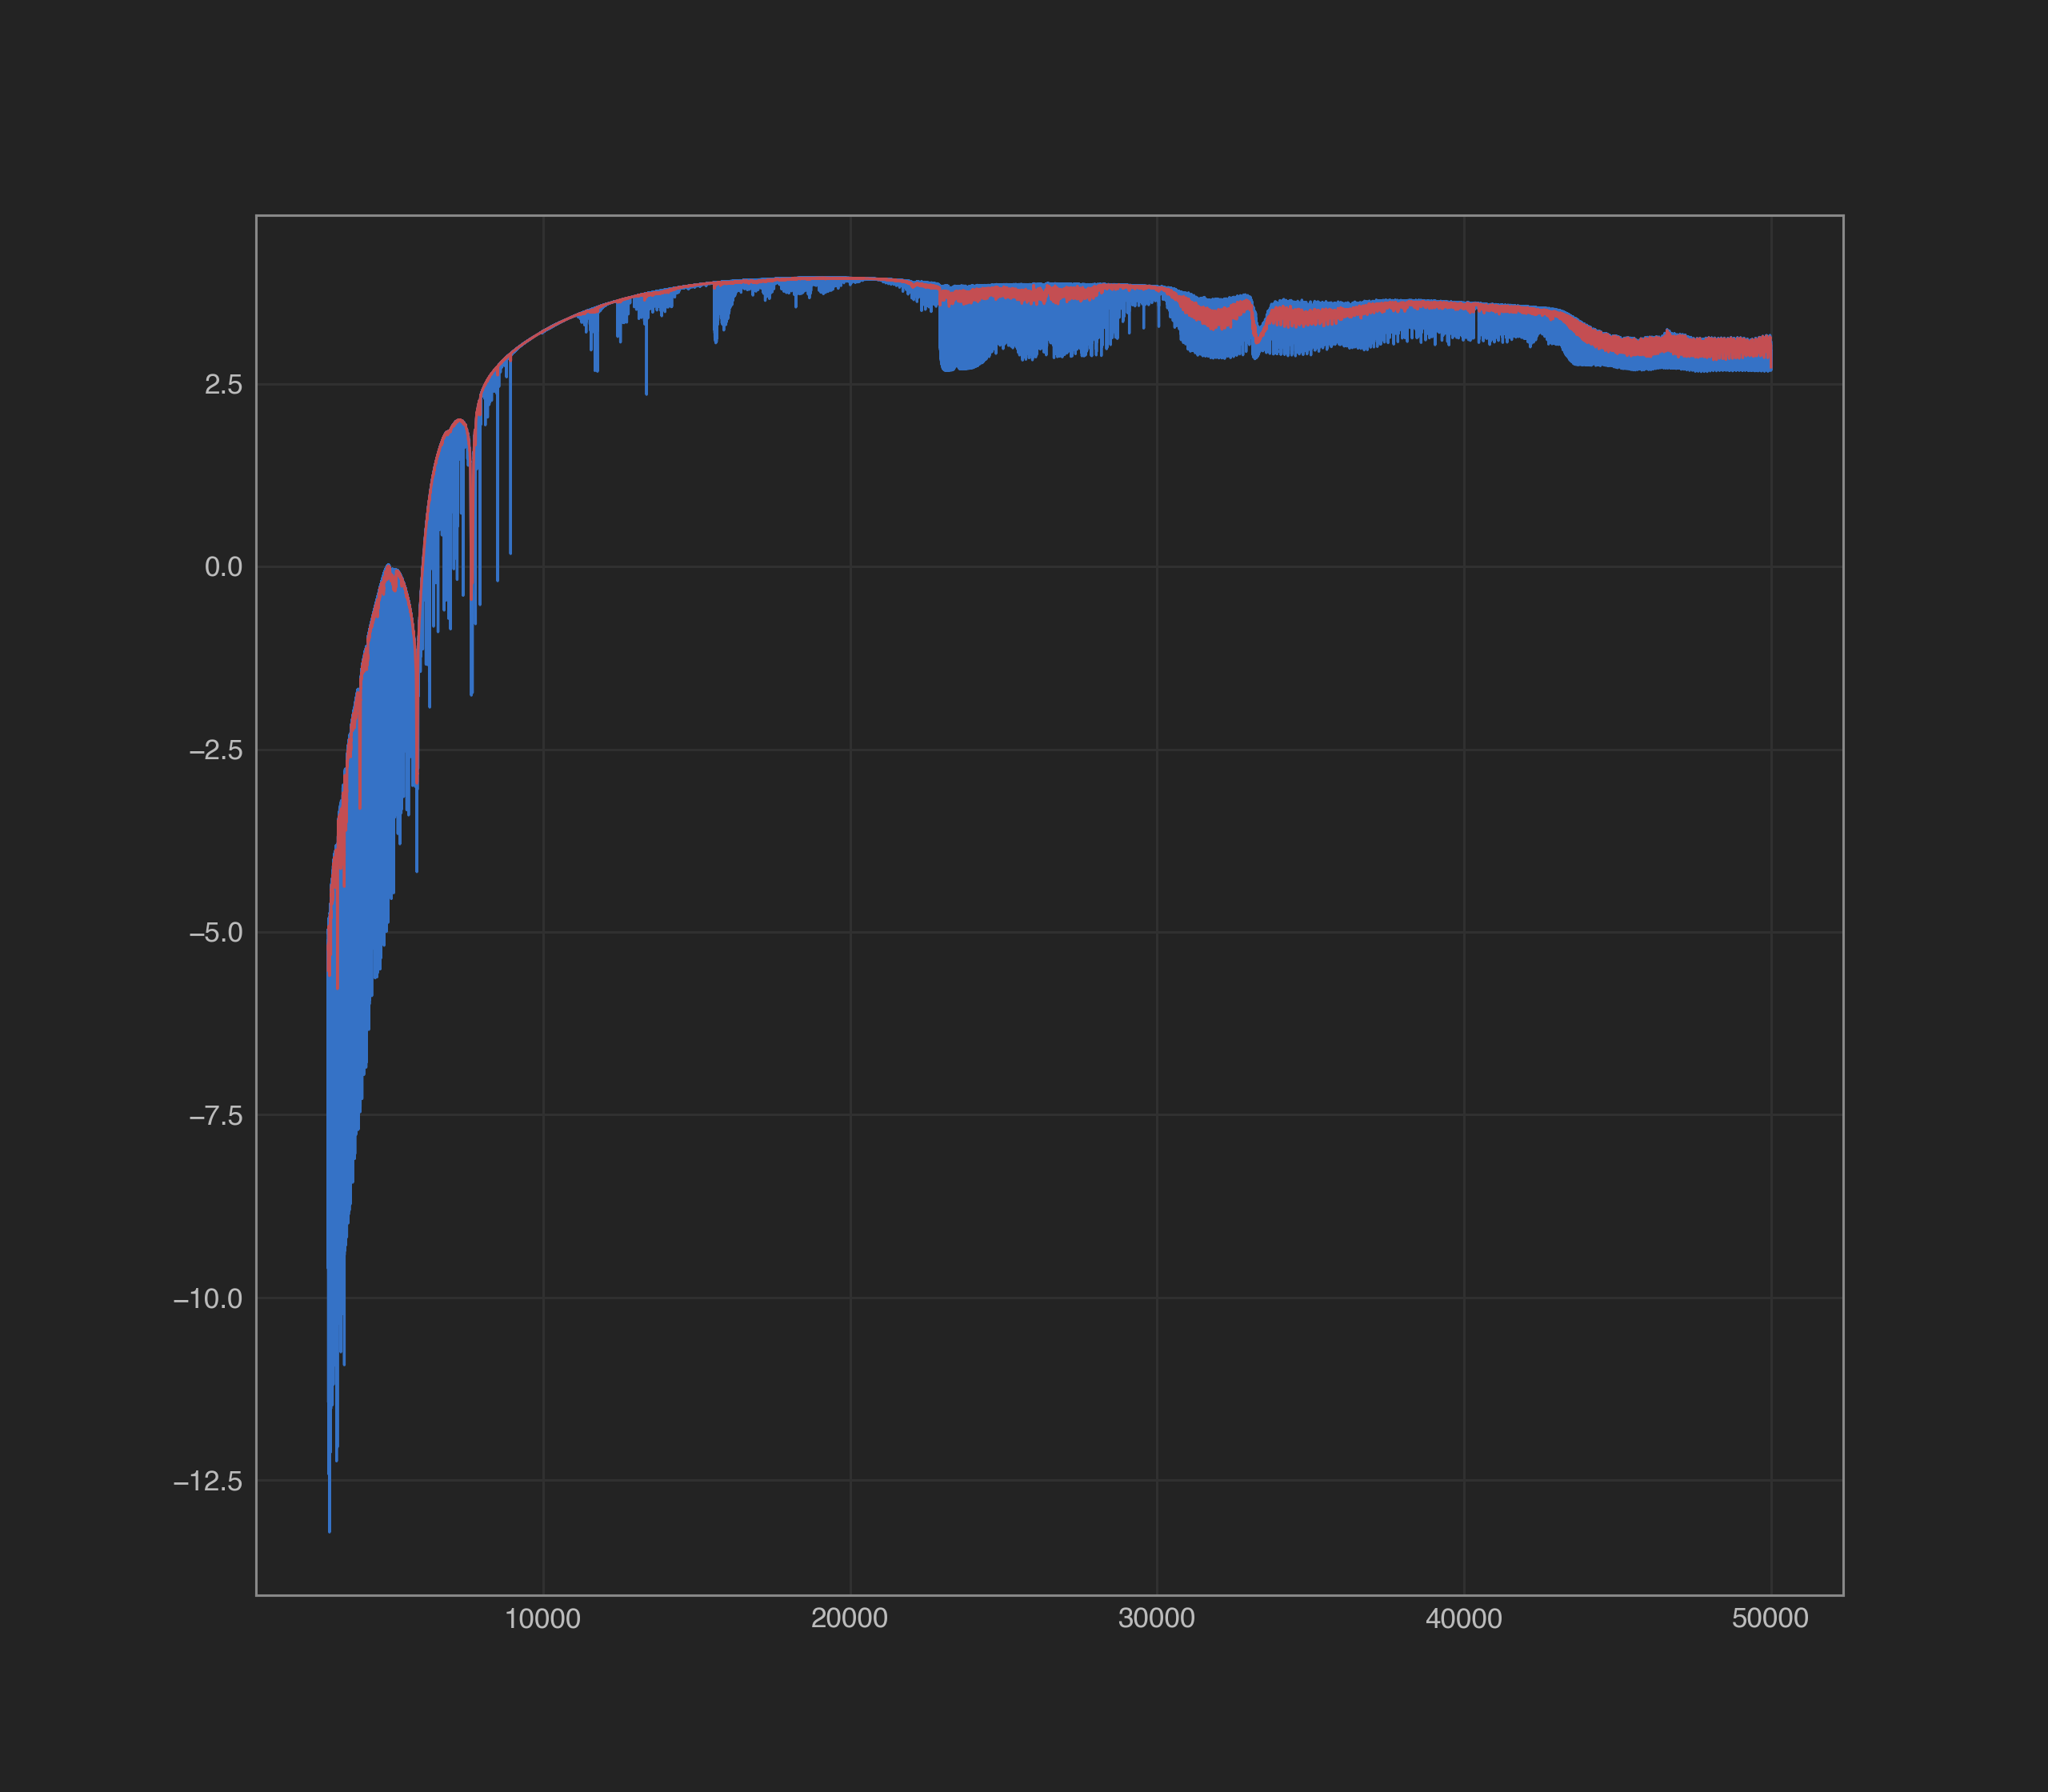

In [13]:
plt.plot(x_dash,np.log10(y_dash),'b',x_after_inter,np.log10(convolved_curve),'r')

In [12]:
# Plot everything of a dataset at once
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sci
from scipy import interpolate
from astropy.table import Table
t = Table.read('/Users/tusharkantidas/NIUS/Temp/015.xml')
#print(t)
from astropy.io.votable import parse_single_table
table = parse_single_table('/Users/tusharkantidas/NIUS/Temp/015.xml')

data = table.array

print(data)
# Lambda_0 = 5000 Angstrom
lambda_o = 5000  # # # This is the confusion. What are we supposed to take this lambda not.
inclination = (np.pi)/6         # in radian
c = sci.constants.c # speed of light
G = sci.constants.G        #gravitational constant
# M_star = 10**30    # mass of proto-star in consideration
R #= 10**7         # Radius
v_kep = (G*M_s/R)**0.5      # in metres per second
print('v keplerian: {} in metres per sec'.format(v_kep))
np.sin(inclination)/(c) * v_kep
lambda_max =  (lambda_o * np.sin(inclination))/(c) * v_kep
print('lambda max: ',lambda_max)


t = int(input('Enter the temp of the plot: '))  # input the temp of interest
trimmed_temp = np.extract(tempp > t - 50,tempp)
trimmed_temp = np.extract(trimmed_temp < t + 50, trimmed_temp)
trimmed_temp # Window of interest in terms of temp
trimmed_radius = np.extract(tempp > t - 50, radius)
trimmed_radius = np.extract(trimmed_temp < t + 50, trimmed_radius)
trimmed_radius  # Window of interest in terms of radius
print('Total no of data points in temp range {} +/- 50 is {}'.format(t,len(trimmed_radius)))
print('Average value of radius that can be taken: {}'.format(sum(trimmed_radius)/len(trimmed_radius)))
R = sum(trimmed_radius)/len(trimmed_radius) # radius of accretion disk at that temperature
print('Temperature of this annulus: {} and Radius of the annulus {}'.format(quantum*100, R))

# T_max determination

T_max = 6840 * (((M_s * M_dot_s * 365.25 * 24 * 3600)/(0.3 *(10**(-5)) * (1.9891 * (10**30))**(2))) * (1.6 * 696340 * 1000/ R_in_trunc)**(3))**0.25
print('T_Max: ', T_max)

# T_sub determination
t_sub = int(1400)  # input the temp of interest
trimmed_temp_sub = np.extract(tempp > t_sub - 50,tempp)
trimmed_temp_sub = np.extract(trimmed_temp_sub < t_sub + 50, trimmed_temp_sub)
trimmed_temp_sub # Window of interest in terms of temp
trimmed_radius_sub = np.extract(tempp > t_sub - 50, radius)
trimmed_radius_sub = np.extract(trimmed_temp_sub < t_sub + 50, trimmed_radius_sub)
trimmed_radius_sub  # Window of interest in terms of radius
print('Total no of data points in temp range {} +/- 50 is {}'.format(t_sub,len(trimmed_radius_sub)))
print('Average value of sublimation_radius that can be taken: {}'.format(sum(trimmed_radius_sub)/len(trimmed_radius_sub)))
R_sub = sum(trimmed_radius_sub)/len(trimmed_radius_sub)
R_sub

#finding initial sampling rate of the data
trimmed_data = np.extract(data['WAVELENGTH']>3000,data)
trimmed_data = np.extract(trimmed_data['WAVELENGTH']<50000,trimmed_data)
#print(trimmed_data[0],trimmed_data[-1])
# Sampling rate at Lambda not 
trim_dta = np.extract(trimmed_data['WAVELENGTH']>(lambda_o-lambda_max),trimmed_data)
trim_dta = np.extract(trim_dta['WAVELENGTH']<(lambda_o+lambda_max),trim_dta)
trim_dta
print('Sampling rate at lambda_0: ',len(trim_dta))
#sampling at initial lambda
trim_dta_2 = np.extract(trimmed_data['WAVELENGTH']<(trimmed_data['WAVELENGTH'][0]+(2*lambda_max)),trimmed_data)
#print(trim_dta_2)
#print(len(trim_dta_2))
print('Initial Sampling rate at lambda_i: ',len(trim_dta_2))
#sampling at final lambda
trim_dta_3 = np.extract(trimmed_data['WAVELENGTH']>(trimmed_data['WAVELENGTH'][-1]-(2*lambda_max)),trimmed_data)
trim_dta_3
print('Final Sampling rate at lambda_f: ',len(trim_dta_3))

trim_x = np.extract(data['WAVELENGTH']>3000,data['WAVELENGTH'])
trim_x = np.extract(trim_x<50000,trim_x)
#print(trim_x[0],trim_x[-1])
x_dash = trim_x

trim_y = np.extract(data['WAVELENGTH']>3000,data['FLUX'])
trim_y = np.extract(trim_x<50000,trim_y)
#print(trim_y[0],trim_y[-1])
y_dash = trim_y

diff_in_wave = [0]
for i in range(len(x_dash)-1):
    diff_dash = x_dash[i+1]-x_dash[i]
    diff_in_wave.append(diff_dash)
#print(diff_in_wave)
print('No of data points in range: {}'.format(len(diff_in_wave)))
#plt.plot(x_dash,np.log10(diff_in_wave))
diff_in_wave[-1]

print('kernel width: {}'.format(lambda_max*2))
#Writing the kernel
#x_inter
para_1 = lambda_o-lambda_max
para_2 = lambda_o+lambda_max
para_3 = len(trim_dta_2)
print('kernel initial: {} kernel final: {}, no of data points: {}'.format(para_1, para_2, para_3))
ax = np.linspace(para_1,para_2,para_3,False)
y_ker = (1-((ax-lambda_o)/lambda_max)**2)**(-0.5)
y_ker = np.ma.masked_invalid(y_ker)
y_ker = np.ma.filled(y_ker, 0)
ax=np.delete(ax,0)
y_ker=np.delete(y_ker,0)
#plt.plot(ax,y_ker,)
# y_ker.count()
w = np.count_nonzero(y_ker)
#print(y_ker[0])
# normalise the kernel
final_kernel = y_ker/np.sum(y_ker)
#plt.plot(ax,final_kernel)

#define a new linspace
len(diff_in_wave)
new_difference = np.linspace(diff_in_wave[0],0.2223,len(diff_in_wave)) # the final value how to approach in proper method
#plt.plot(x,wave_dash)
#wave_dash
#print(new_difference)
cumsumm = [0]

for i in range(len(new_difference)):
    xx = new_difference[i] + cumsumm[-1]
    cumsumm.append(xx)
#cf = np.cumsum(new_difference)
#print(cumsumm)
'''x_new = [3000]
for i in range(len(cf)-1):
    new_ele =  cf[i] - x_new[-1]
    x_new.append(new_ele)
len(x_new)
x_new[-1]'''
#new_x = np.linspace(3000,50000,420051)
#plt.plot(new_x,cf)
cf = []
for i in range(len(diff_in_wave)):
    cs = 3000 + cumsumm[i]
    cf.append(cs)
diff_in_wave[-3]
print('cumsum max: ',cf[-1])

# interpolate with a fixed function throughout
cf
y_dash
print(x_dash)
#f = interpolate.interp1d(x_dash,y_dash)
#x_after_inter = np.linspace(3000.2,49996.00,420000)

# interpolate with a fixed function throughout
y_dash
f = interpolate.interp1d(x_dash,y_dash)
#x_after_inter = np.linspace(3000.1,49999.00,420051)
print(len(cf))
#cf.remove(3000)
print('x_dash ',x_dash)
print('cf' ,cf[0],cf[-1])
reqq = x_dash[0]
diff_array = np.absolute(cf - reqq)
index_min = diff_array.argmin()
print(index_min)
index_max = diff_array.argmax()
print(index_max)
print(len(x_dash))
new_y = f(cf[index_min+1:])
#plt.plot(cf[index_min+1:index_max+1],new_y)
#plt.plot()
convolved_curve = np.convolve(new_y, final_kernel, mode='same')
#plt.plot(x_dash,np.log10(y_dash),'b',cf[index_min+1:],np.log10(convolved_curve),'r')
cf[index_max]

FileNotFoundError: [Errno 2] No such file or directory: '/Users/tusharkantidas/NIUS/Temp/015.xml'

In [73]:
#%matplotlib notebook

In [6]:
lambda_o = 5000  # # # This is the confusion. What are we supposed to take this lambda not.
i = (np.pi)/6         # in radian
c = sci.constants.c # speed of light
G = sci.constants.G        #gravitational constant
sigma = sci.constants.sigma     #stephen boltzmann constant
#M_star = (1/2)*10**30    # mass of proto-star in consideration
R = 2*10**7         # Radius
v_kep = (G*M_s/R)**0.5      # in metres per second
print('v keplerian: {} in metres per sec'.format(v_kep))
np.sin(i)/(c) * v_kep
lambda_max =  (lambda_o * np.sin(i))/(c) * v_kep
print(lambda_max)
c

v keplerian: 1995684.1030082891 in metres per sec
16.642214053032387


299792458.0

In [7]:
# R_in # inner truncation radius
# Refering Bovier paper
B_s = 1000 * (10**(-4))# in TESLA SI Unit
M_s = 0.6 * 1.9891 * (10**30) # twice of our sun in kg
M_dot_s = 3.8 * 10**(-5) * 1.9891 * (10**30) # accretion rate in units of mass of sun ##per year
M_dot_s = (3.8 * 10**(-5) * 1.9891 * (10**30))/(60*60*24*365.25) # in kg per sec
R_s = 2 * 696340 * 1000 # in metres

R_in_trunc = ((B_s)**(4/7) * (R_s)**(12/7))/((M_dot_s)**(2/7) * (2*G*M_s)**(1/7)) # in SI units
R_in_trunc = 3.5 * R_s
R_in_trunc
# Problem is reading the values in formula for R_trucation


4874380000.0

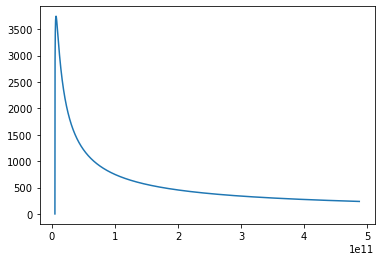

In [10]:
# dont know why are the values so large????
radius = np.linspace(R_in_trunc, 100 * R_in_trunc, 10000)
sigma = sci.constants.sigma
tempp = ((3 * G * M_s * M_dot_s) / (8 * np.pi * sigma * ((radius) ** 3)) * (1 - ((R_in_trunc / radius) ** (1 / 2))))**0.25
plt.plot(radius,tempp)

In [11]:
# here we define a window of 100K where we want to find the average value of radius for a given input of temperature
radius_vs_temp = (radius,tempp)  # define an array of rad vs temp
t = int(input('Enter the value of temp: '))  # input the temp of interest
trimmed_temp = np.extract(tempp > t - 50,tempp)
trimmed_temp = np.extract(trimmed_temp < t + 50, trimmed_temp)
trimmed_temp # Window of interest in terms of temp
trimmed_radius = np.extract(tempp > t - 50, radius)
trimmed_radius = np.extract(trimmed_temp < t + 50, trimmed_radius)
trimmed_radius  # Window of interest in terms of radius
print('Total no of data points in temp range {} +/- 50 is {}'.format(t,len(trimmed_radius)))
print('Average value of radius that can be taken: {}'.format(sum(trimmed_radius)/len(trimmed_radius)))
R = sum(trimmed_radius)/len(trimmed_radius) # radius of accretion disk at that temperature

Enter the value of temp: 1600
Total no of data points in temp range 1600 +/- 50 is 64
Average value of radius that can be taken: 6442868613.861385


In [12]:
lambda_o = 5000  # # # This is the confusion. What are we supposed to take this lambda not.
i = (np.pi)/6         # in radian
c = sci.constants.c # speed of light
G = sci.constants.G        #gravitational constant
sigma = sci.constants.sigma     #stephen boltzmann constant
M_s   # mass of proto-star in consideration
R # Radius
v_kep = (G*M_s/R)**0.5      # in metres per second
print('v keplerian: {} in metres per sec'.format(v_kep))
np.sin(i)/(c) * v_kep
lambda_max =  (lambda_o * np.sin(i))/(c) * v_kep
print(lambda_max)

v keplerian: 111190.36558822863 in metres per sec
0.9272278423047304


In [13]:
# T_max determination

T_max = 6840 * (((M_s * M_dot_s * 365.25 * 24 * 3600)/(0.3 *(10**(-5)) * (1.9891 * (10**30))**(2))) * (1.6 * 696340 * 1000/ R_in_trunc)**(3))**0.25
T_max
# T_sub determination
t_sub = int(1400)  # input the temp of interest
trimmed_temp_sub = np.extract(tempp > t_sub - 50,tempp)
trimmed_temp_sub = np.extract(trimmed_temp_sub < t_sub + 50, trimmed_temp_sub)
trimmed_temp_sub # Window of interest in terms of temp
trimmed_radius_sub = np.extract(tempp > t_sub - 50, radius)
trimmed_radius_sub = np.extract(trimmed_temp_sub < t_sub + 50, trimmed_radius_sub)
trimmed_radius_sub  # Window of interest in terms of radius
print('Total no of data points in temp range {} +/- 50 is {}'.format(t_sub,len(trimmed_radius_sub)))
print('Average value of sublimation_radius that can be taken: {}'.format(sum(trimmed_radius_sub)/len(trimmed_radius_sub)))
R_sub = sum(trimmed_radius_sub)/len(trimmed_radius_sub)
R_sub

Total no of data points in temp range 1400 +/- 50 is 88
Average value of sublimation_radius that can be taken: 7022002871.2871275


7022002871.2871275

In [6]:
# A demo array to check the function
arr = [1, 3, 4, 5, 2]
a = np.array(arr)
n = len(arr)
# Function
def largest(arr,n):
    max = arr[0]
    
    for i in range(1,n):
        if arr[i] > max:
            max = arr[i]
    return max
ans = largest(arr,n)
#print('Largest element is: ', ans)

In [11]:
import time
st = time.time()
#print('Start time :', st)
lst_convolved = []
lst_radius = []
lst_num_radius =[]
for quantum in range(19,22):
    if quantum > 70:
        if np.mod(quantum, 2) == 0:
            continue
        else:
            quantum = quantum + 1
    print('dataset for {} ---------------------------------------------------------------------------------------|-|-|-|'.format(quantum))
    import numpy as np
    import numpy.ma as ma
    import matplotlib.pyplot as plt
    import pandas as pd
    import scipy as sci
    from scipy import interpolate
    from astropy.table import Table
    from astropy.io.votable import parse_single_table
    if quantum in range(14,20):
        t = Table.read('/Users/tusharkantidas/NIUS/Temp/lte0{}-3.5-0.0.BT-Settl.7.dat.xml'.format(quantum))
        #print(t)
        table = parse_single_table('/Users/tusharkantidas/NIUS/Temp/lte0{}-3.5-0.0.BT-Settl.7.dat.xml'.format(quantum))
        #print(table)
    elif quantum in range(20,26):
        t = Table.read('/Users/tusharkantidas/NIUS/Temp/lte0{}-1.5-0.0.BT-Settl.7.dat.xml'.format(quantum))
        #print(t)
        table = parse_single_table('/Users/tusharkantidas/NIUS/Temp/lte0{}-1.5-0.0.BT-Settl.7.dat.xml'.format(quantum))
        #print(table)
    else:
        t = Table.read('/Users/tusharkantidas/NIUS/Temp/lte026-1.5-0.0a+0.0.BT-Settl.7.dat.xml'.format(quantum))
        #print(t)
        table = parse_single_table('/Users/tusharkantidas/NIUS/Temp/lte026-1.5-0.0a+0.0.BT-Settl.7.dat.xml'.format(quantum))
    data = table.array

    #print(data)
    # R_in # inner truncation radius
    # Refering Bovier paper
    B_s = 1000 * (10**(-4))# in TESLA SI Unit
    M_s = 0.6 * 1.9891 * (10**30) # twice of our sun in kg
    M_dot_s = 3.8 * 10**(-5) * 1.9891 * (10**30) # accretion rate in units of mass of sun ##per year
    M_dot_s = (3.8 * 10**(-7) * 1.9891 * (10**30))/(60*60*24*365.25) # in kg per sec
    R_s = 1.6 * 696340 * 1000 # in metres
    G = sci.constants.G        #gravitational constant
    R_in_trunc = ((B_s)**(4/7) * (R_s)**(12/7))/((M_dot_s)**(2/7) * (2*G*M_s)**(1/7)) # in SI units
    R_in_trunc = 2 * 696340 * 1000
    print('R_in and R_stellar respectively: ', R_in_trunc, R_s) #= R_s
    #R_in_trunc must be 2 R_solar = 1 R_s for Perez et al
    #R_in_trunc must be 3.5 

    # T_sub Archis method
    r = np.linspace(R_in_trunc,100*R_in_trunc,100000)
    T_inp = 1400
    f_r = T_inp**4 + 0*r
    sigma = sci.constants.sigma
    k = (3*G*M_dot_s*M_s)/(8*np.pi*sigma)
    g_r = (k/(r**3))*(1-(R_in_trunc/r)**0.5)
    #plt.plot(r,f_r)
    #plt.plot(r,g_r)
    idx = np.argwhere(np.diff(np.sign(f_r-g_r))).flatten()
    #plt.plot(r[idx],f_r[idx],'ro')
    #plt.show()
    r[idx]
    print('For the Sublimation temperature of T_sub = {} , Radius_sub = {}'.format(T_inp,r[idx][1]))

    radius = np.linspace(R_in_trunc, r[idx][1], 100000)
    tempp = ((3 * G * M_s * M_dot_s) / (8 * np.pi * sigma * ((radius) ** 3)) * (1 - ((R_in_trunc / radius) ** (1 / 2))))**0.25
    # Correcting the graph of temp vs radius profile
    max_temp = largest(tempp,1000)
    index_max_temp = np.where(tempp == max_temp)
    index_max_temp[0][0] # 1st box tells to give all elements where the element exists, 2nd box tells the 1st element of that array
    print('Maximum Temperature: ',max_temp)
    print('Index of maximum temperature in the array: ',index_max_temp[0][0])

    # Corrected_temp_vs_radius
    tempp2 = []
    for i in range(len(tempp)):
        if i < index_max_temp[0][0]:
            tempp2.append(max_temp)
        else:
            tempp2.append(tempp[i])

    tempp_correct = np.array(tempp2)

    t = quantum*100  # input the temp of interest
    trimmed_temp = np.extract(tempp_correct > t - 50,tempp_correct)
    trimmed_temp = np.extract(trimmed_temp < t + 50, trimmed_temp)
    trimmed_temp # Window of interest in terms of temp
    trimmed_radius = np.extract(tempp_correct > t - 50, radius)
    trimmed_radius = np.extract(trimmed_temp < t + 50, trimmed_radius)
    trimmed_radius  # Window of interest in terms of radius
    print('Total no of data points in temp range {} +/- 50 is {}'.format(t,len(trimmed_radius)))
    print('Average value of radius that can be taken: {}'.format(sum(trimmed_radius)/len(trimmed_radius)))
    R = sum(trimmed_radius)/len(trimmed_radius) # radius of accretion disk at that temperature
    print('Temperature of this annulus: {} and Radius of the annulus {}'.format(t, R))
    R_in_trunc
    R
    if quantum == 14:
        lst_radius.append(R*2)
    else:
        lst_radius.append(R)
    if quantum == 14:
        lst_num_radius.append(len(trimmed_radius)*2)
    else:
        lst_num_radius.append(len(trimmed_radius))
    # T Max
    T_max = 6840 * (((M_s * M_dot_s * 365.25 * 24 * 3600)/(0.3 *(10**(-5)) * (1.9891 * (10**30))**(2))) * (1.6 * 696340 * 1000/ R_in_trunc)**(3))**0.25
    print('T_Max: ', T_max)
    h_r = T_max**4 + 0*r
    #plt.plot(r,h_r)
    idx_Tmax = np.argwhere(np.diff(np.sign(h_r-g_r))).flatten()
    # plt.plot(r[idx_Tmax],h_r[idx_Tmax],'yo')
    # T_Max issue Ask Sir 
    
    
    # Lambda_0 = 5000 Angstrom
    lambda_o = 5000  # # # This is the confusion. What are we supposed to take this lambda not.
    inclination = (np.pi)/6         # in radian
    c = sci.constants.c # speed of light
    G = sci.constants.G        #gravitational constant
    # M_star = 10**30    # mass of proto-star in consideration
    R #= 10**7         # Radius
    v_kep = (G*M_s/R)**0.5      # in metres per second
    print('v keplerian: {} in metres per sec'.format(v_kep))
    np.sin(inclination)/(c) * v_kep
    lambda_max =  (lambda_o * np.sin(inclination))/(c) * v_kep
    print('lambda max: ',lambda_max)

    
    #finding initial sampling rate of the data
    trimmed_data = np.extract(data['WAVELENGTH']>3000,data)
    trimmed_data = np.extract(trimmed_data['WAVELENGTH']<50000,trimmed_data)
    #print(trimmed_data[0],trimmed_data[-1])
    # Sampling rate at Lambda not 
    trim_dta = np.extract(trimmed_data['WAVELENGTH']>(lambda_o-lambda_max),trimmed_data)
    trim_dta = np.extract(trim_dta['WAVELENGTH']<(lambda_o+lambda_max),trim_dta)
    trim_dta
    print('Sampling rate at lambda_0: ',len(trim_dta))
    #sampling at initial lambda
    trim_dta_2 = np.extract(trimmed_data['WAVELENGTH']<(trimmed_data['WAVELENGTH'][0]+(2*lambda_max)),trimmed_data)
    #print(trim_dta_2)
    #print(len(trim_dta_2))
    print('Initial Sampling rate at lambda_i: ',len(trim_dta_2))
    #sampling at final lambda
    trim_dta_3 = np.extract(trimmed_data['WAVELENGTH']>(trimmed_data['WAVELENGTH'][-1]-(2*lambda_max)),trimmed_data)
    trim_dta_3
    print('Final Sampling rate at lambda_f: ',len(trim_dta_3))

    trim_x = np.extract(data['WAVELENGTH']>3000,data['WAVELENGTH'])
    trim_x = np.extract(trim_x<50000,trim_x)
    #print(trim_x[0],trim_x[-1])
    x_dash = trim_x

    trim_y = np.extract(data['WAVELENGTH']>3000,data['FLUX'])
    trim_y = np.extract(trim_x<50000,trim_y)
    #print(trim_y[0],trim_y[-1])
    y_dash = trim_y

    diff_in_wave = [0]
    for i in range(len(x_dash)-1):
        diff_dash = x_dash[i+1]-x_dash[i]
        diff_in_wave.append(diff_dash)
    #print(diff_in_wave)
    print('No of data points in range: {}'.format(len(diff_in_wave)))
    #plt.plot(x_dash,np.log10(diff_in_wave))
    diff_in_wave[-1]

    print('kernel width: {}'.format(lambda_max*2))
    #Writing the kernel
    #x_inter
    para_1 = lambda_o-lambda_max
    para_2 = lambda_o+lambda_max
    para_3 = len(trim_dta_2)
    print('kernel initial: {} kernel final: {}, no of data points: {}'.format(para_1, para_2, para_3))
    ax = np.linspace(para_1,para_2,para_3,False)
    y_ker = (1-((ax-lambda_o)/lambda_max)**2)**(-0.5)
    y_ker = np.ma.masked_invalid(y_ker)
    y_ker = np.ma.filled(y_ker, 0)
    ax=np.delete(ax,0)
    y_ker=np.delete(y_ker,0)
    #plt.plot(ax,y_ker,)
    # y_ker.count()
    w = np.count_nonzero(y_ker)
    #print(y_ker[0])
    # normalise the kernel
    final_kernel = y_ker/np.sum(y_ker)
    #plt.plot(ax,final_kernel)

    #define a new linspace
    #len(diff_in_wave)
    if quantum in range(14,20):
        new_difference = np.linspace(diff_in_wave[0],0.23804,len(diff_in_wave)) # the final value how to approach in proper method
        #plt.plot(x,wave_dash)
        #wave_dash
        #print(new_difference)
        '''cumsumm = [0]
        for i in range(len(new_difference)):
            xx = new_difference[i] + cumsumm[-1]
            cumsumm.append(xx)'''
        cf = np.cumsum(new_difference)
        #print(cumsumm)
        '''x_new = [3000]
        for i in range(len(cf)-1):
            new_ele =  cf[i] - x_new[-1]
            x_new.append(new_ele)
        len(x_new)
        x_new[-1]'''
        #new_x = np.linspace(3000,50000,420051)
        #plt.plot(new_x,cf)
        '''cf = []
        for i in range(len(diff_in_wave)):
            cs = 3000 + cumsumm[i]
            cf.append(cs)
        diff_in_wave[-3]'''
        print('cumsum max: ',cf[-1])
    
    elif quantum in range(20,26):
        new_difference = np.linspace(diff_in_wave[0],0.23804,420050) # the final value how to approach in proper method
        #plt.plot(x,wave_dash)
        #wave_dash
        #print(new_difference)
        '''cumsumm = [0]
        for i in range(len(new_difference)):
            xx = new_difference[i] + cumsumm[-1]
            cumsumm.append(xx)'''
        cf = np.cumsum(new_difference)
        #print(cumsumm)
        '''x_new = [3000]
        for i in range(len(cf)-1):
              new_ele =  cf[i] - x_new[-1]
              x_new.append(new_ele)
        len(x_new)
        x_new[-1]'''
        #new_x = np.linspace(3000,50000,420051)
        #plt.plot(new_x,cf)
        '''cf = []
        for i in range(len(diff_in_wave)):
            cs = 3000 + cumsumm[i]
            cf.append(cs)
        diff_in_wave[-3]'''
        print('cumsum max: ',cf[-1])
    else:
        new_difference = np.linspace(diff_in_wave[0],0.23806,420050) # the final value how to approach in proper method
        #plt.plot(x,wave_dash)
        #wave_dash
        #print(new_difference)
        '''cumsumm = [0]
        for i in range(len(new_difference)):
            xx = new_difference[i] + cumsumm[-1]
            cumsumm.append(xx)'''
        cf = np.cumsum(new_difference)
        #print(cumsumm)
        '''x_new = [3000]
        for i in range(len(cf)-1):
            new_ele =  cf[i] - x_new[-1]
            x_new.append(new_ele)
        len(x_new)
        x_new[-1]'''
        #new_x = np.linspace(3000,50000,420051)
        #plt.plot(new_x,cf)
        ''' cf = []
        for i in range(len(diff_in_wave)):
            cs = 3000 + cumsumm[i]
            cf.append(cs)
        diff_in_wave[-3]'''
        print('cumsum max: ',cf[-1])
    # interpolate with a fixed function throughout
    cf
    y_dash
    #print('x_dash: 'x_dash)
    #f = interpolate.interp1d(x_dash,y_dash)
    #x_after_inter = np.linspace(3000.2,49996.00,420000)

    # interpolate with a fixed function throughout
    y_dash
    f = interpolate.interp1d(x_dash,y_dash)
    #x_after_inter = np.linspace(3000.1,49999.00,420051)
    print('length of cf: ',len(cf))
    #cf.remove(3000)
    print('x_dash ',x_dash)
    print('cf' ,cf[0],cf[-1])
    reqq = x_dash[0]
    diff_array = np.absolute(cf - reqq)
    index_min = diff_array.argmin()
    #print('Min index in :',index_min)
    index_max = diff_array.argmax()
   # print(index_max)
    print('length of x_dash', len(x_dash))
    new_y = f(cf[index_min+1:])
    #plt.plot(cf[index_min+1:index_max+1],new_y)
    #plt.plot()
    convolved_curve = np.convolve(new_y, final_kernel, mode='same')
    lst_convolved.append(convolved_curve)
    #plt.plot(x_dash,np.log10(y_dash),'b',cf[index_min+1:],np.log10(convolved_curve),'r')
    cf[index_max]
lst_convolved
print('lst of convolved data: ', lst_convolved)
print('lst of radii: ', lst_radius)
print('lst of number of radius taken: ', lst_num_radius)
et = time.time()
elasped_time = et-st
print('Time taken to run the code: ',elasped_time)

dataset for 19 ---------------------------------------------------------------------------------------|-|-|-|
R_in and R_stellar respectively:  1392680000 1114144000.0
For the Sublimation temperature of T_sub = 1400 , Radius_sub = 8541586831.068311
Maximum Temperature:  2370.983073547228
Index of maximum temperature in the array:  999
Total no of data points in temp range 1900 +/- 50 is 6332
Average value of radius that can be taken: 1618980908.7465432
Temperature of this annulus: 1900 and Radius of the annulus 1618980908.7465432
T_Max:  3037.924595653054
v keplerian: 221812.45672176417 in metres per sec
lambda max:  1.8497167857518628
Sampling rate at lambda_0:  74
Initial Sampling rate at lambda_i:  74
Final Sampling rate at lambda_f:  19
No of data points in range: 420050
kernel width: 3.6994335715037256
kernel initial: 4998.150283214248 kernel final: 5001.849716785752, no of data points: 74
cumsum max:  49994.35099999998
length of cf:  420050
x_dash  [3000.030029296875 3000.0800781

/var/folders/57/5kj1j9cj2lb94mn77v2nv4200000gn/T/ipykernel_35213/1889594961.py:178: RuntimeWarning: invalid value encountered in power
  y_ker = (1-((ax-lambda_o)/lambda_max)**2)**(-0.5)


R_in and R_stellar respectively:  1392680000 1114144000.0
For the Sublimation temperature of T_sub = 1400 , Radius_sub = 8541586831.068311
Maximum Temperature:  2370.983073547228
Index of maximum temperature in the array:  999
Total no of data points in temp range 2000 +/- 50 is 5642
Average value of radius that can be taken: 1594316933.5396063
Temperature of this annulus: 2000 and Radius of the annulus 1594316933.5396063
T_Max:  3037.924595653054
v keplerian: 223521.58392641135 in metres per sec
lambda max:  1.8639693724917799
Sampling rate at lambda_0:  4
Initial Sampling rate at lambda_i:  4
Final Sampling rate at lambda_f:  1
No of data points in range: 19802
kernel width: 3.7279387449835597
kernel initial: 4998.136030627508 kernel final: 5001.863969372492, no of data points: 4
cumsum max:  49994.35099999998
length of cf:  420050
x_dash  [3000.1298828125 3001.1298828125 3002.1298828125 ... 49986.3984375
 49991.3984375 49996.3984375]
cf 0.0 49994.35099999998
length of x_dash 19802
d

/var/folders/57/5kj1j9cj2lb94mn77v2nv4200000gn/T/ipykernel_35213/1889594961.py:178: RuntimeWarning: invalid value encountered in power
  y_ker = (1-((ax-lambda_o)/lambda_max)**2)**(-0.5)


<class 'list'> <class 'list'>


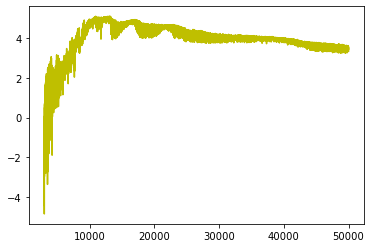

In [12]:
lst_convolved
lst_num_radius
lst_radius
lst_convolved_flx = []
for i in range(len(lst_radius)):
    flux = 2*np.pi*lst_radius[i]*lst_convolved[i]*lst_num_radius[i]/sum(lst_num_radius) # flux from each temperature region = 2pir * flux from 1 ring * num of rings
    lst_convolved_flx.append(flux)
lst_convolved_flx # Normalisation of the list
lst_cumsum_index_min_plus1 = list(cf[index_min+1:])
plt.plot(cf[index_min+1:],np.log10(convolved_curve),'y')
print(type(lst_cumsum_index_min_plus1), type(lst_convolved_flx))


## here I check if the radius value gradually increases or not. Initially I was seeing an error occuring as linspace for radius was small so average radius was just abrupt

In [73]:
# checking the correctness of the code
lst_radius_diff = []
error_radius = []
for i in range(len(lst_radius)-1):
    difff = lst_radius[i]-lst_radius[i+1]
    lst_radius_diff.append(difff)
print(lst_radius_diff)
for j in range(len(lst_radius)-1):
    if lst_radius_diff[j] < 0:
        error_radius.append(j)
print(error_radius)
for k in error_radius:
    print(lst_radius[k])

[1604944761.892404, 236211598.74849606, 191383120.15388966, 157091249.77596617, 130462367.1919918, 109197576.06378126, 92339002.91709232, 78737199.58283138, 67434292.5867567, 58430281.928865194, 50767294.134916544, 44445329.20490694, 38889663.0542953, 34291870.37792468, 30651951.175798655, 27203606.668520212, 24138411.550941944, 22031089.907604218, 19349044.1797235, 18008021.315781593, 15709124.977595806, 14751251.50335288, 13410228.63941288, 11877631.080621004, 11111332.301226616, 10345033.52183199, 9195585.352740526, 8620861.268193007, 7854562.488797665, 7471413.09910059, 6705114.319705963, 6321964.930008888, 5747240.845461845, 5555666.150613308, 4980942.066067457, 4789367.37121892, 4406217.981520414, 4023068.5918233395, 3831493.896974802, 3831493.8969750404, 3256769.812428713, 3065195.117580414, 3065195.1175792217, 2873620.4227309227, 2490471.033033371, 2682045.7278823853, 2107321.643336296, 2298896.338185072, 2107321.6433360577, 1915746.9484872818, 1915746.9484872818, 1532597.55878

In [74]:
t = 1600  # input the temp of interest
trimmed_temp = np.extract(tempp > t - 50,tempp)
trimmed_temp = np.extract(trimmed_temp < t + 50, trimmed_temp)
trimmed_temp # Window of interest in terms of temp
trimmed_radius = np.extract(tempp > t - 50, radius)
trimmed_radius = np.extract(trimmed_temp < t + 50, trimmed_radius)
trimmed_radius  # Window of interest in terms of radius
print('Total no of data points in temp range {} +/- 50 is {}'.format(t,len(trimmed_radius)))
print('Average value of radius that can be taken: {}'.format(sum(trimmed_radius)/len(trimmed_radius)))
R = sum(trimmed_radius)/len(trimmed_radius) # radius of accretion disk at that temperature
print('Temperature of this annulus: {} and Radius of the annulus {}'.format(quantum*100, R))

Total no of data points in temp range 1600 +/- 50 is 7506
Average value of radius that can be taken: 2830831234.2294874
Temperature of this annulus: 8800 and Radius of the annulus 2830831234.2294874


In [87]:
aare = np.array(lst_cumsum_index_min_plus1)
aare.tofile('Cumsum.csv',sep = ',')

In [33]:
aare_convolved = np.array(lst_convolved_flx, dtype = object)
aare_convolved.tofile('Convolved1.csv',sep = ',')

In [34]:
print(lst_convolved_flx[0].dtype)

float64


In [108]:
aare_radius = np.array(lst_radius)
aare_radius.tofile('Radius.csv',sep = ',')

In [19]:
import csv

with open('Radius.csv', 'r') as csvfile:
    radii = list(csv.reader(csvfile))
    
print(radii)
list_of_radius = radii[0]

with open('Cumsum.csv', 'r') as cumulative_sum:
    c_f = list(csv.reader(cumulative_sum))
list_of_c_f = c_f[0]

with open('Convolved.csv','r') as convolution:
    con_vlvd = list(csv.reader(convolution))


[['4671604445.480689', '3066659683.588285', '2830448084.839789', '2639064964.6858993', '2481973714.909933', '2351511347.7179413', '2242313771.65416', '2149974768.7370677', '2071237569.1542363', '2003803276.5674796', '1945372994.6386144', '1894605700.5036979', '1850160371.298791', '1811270708.2444956', '1776978837.866571', '1746326886.6907723', '1719123280.022252', '1694984868.4713101', '1672953778.563706', '1653604734.3839824', '1635596713.0682008', '1619887588.090605', '1605136336.5872521', '1591726107.9478393', '1579848476.8672183', '1568737144.5659916', '1558392111.0441597', '1549196525.6914191', '1540575664.423226', '1532721101.9344285', '1525249688.8353279', '1518544574.515622', '1512222609.585613', '1506475368.7401512', '1500919702.5895379', '1495938760.5234704', '1491149393.1522515', '1486743175.170731', '1482720106.5789077', '1478888612.681933', '1475057118.784958', '1471800348.9725292', '1468735153.8549488', '1465669958.7373695', '1462796338.3146386', '1460305867.2816052', '14

<IPython.core.display.Javascript object>


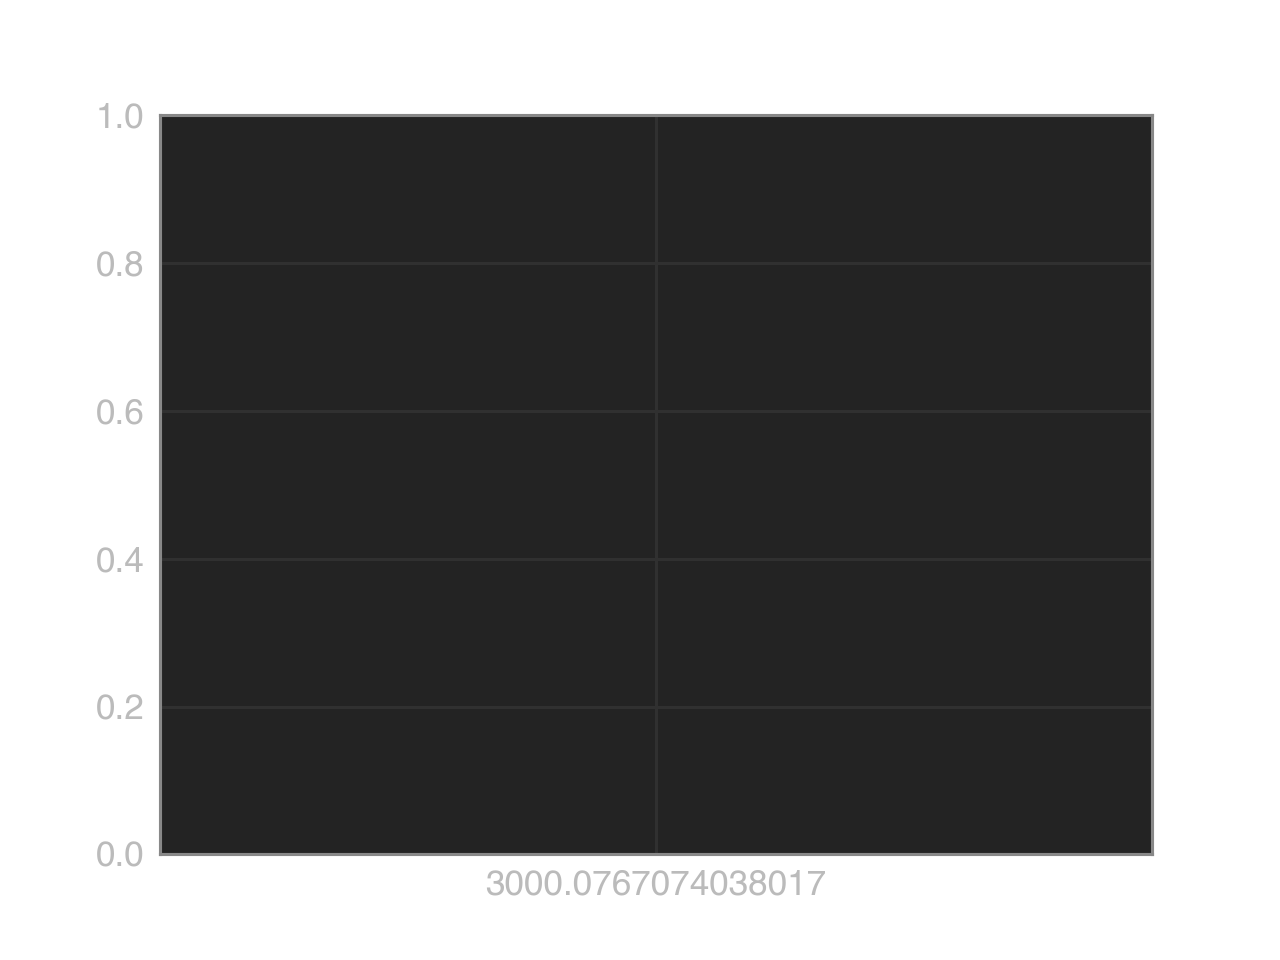

ValueError: x and y must have same first dimension, but have shapes (317157,) and (1,)

In [40]:
#plt.plot(np.arange(1,67), dtt[0])
for i in range(len(con_vlvd)):
    plt.plot(list_of_c_f, np.log10(convolved_curve[i]))
plt.show()

In [38]:
con_vlvd

[['array([5.03906135e+03', ' 5.17563859e+03', ' 5.27142490e+03', ' ...', ''],
 ['       1.56917657e+12',
  ' 1.51864640e+12',
  ' 1.46797367e+12])',
  'array([2.18368568e+05',
  ' 2.48098715e+05',
  ' 2.83702105e+05',
  ' ...',
  ''],
 ['       1.43298400e+12',
  ' 1.40448101e+12',
  ' 1.41041807e+12])',
  'array([1.24702480e+04',
  ' 1.29510159e+04',
  ' 1.33891967e+04',
  ' ...',
  ''],
 ['       1.51494204e+12',
  ' 1.46638627e+12',
  ' 1.43385779e+12])',
  'array([2.40536279e+05',
  ' 2.46359348e+05',
  ' 2.52519195e+05',
  ' ...',
  ''],
 ['       1.39282158e+12',
  ' 1.34905440e+12',
  ' 1.30588954e+12])',
  'array([1.19536316e+05',
  ' 1.23879627e+05',
  ' 1.28045176e+05',
  ' ...',
  ''],
 ['       1.14195159e+12',
  ' 1.11201294e+12',
  ' 1.07665383e+12])',
  'array([1.54815526e+04',
  ' 1.57613022e+04',
  ' 1.63569345e+04',
  ' ...',
  ''],
 ['       9.64727431e+11',
  ' 9.41826743e+11',
  ' 9.16729459e+11])',
  'array([8.33310141e+05',
  ' 1.24311716e+06',
  ' 1.16390471e+06

In [39]:
print(len(lst_cumsum_index_min_plus1))

317157


## How to save a ndarray by saving each small array and then loading each file via loop into a list

In [51]:
#Saving ndarray --> .npy file
for i in range(len(con_vlvd)): # run i in range of con
    np.save('Con_{}.npy'.format(i), con_vlvd[i])# this saves each of array in separate files

#Calling the .npy file from array
'''con_vlvd1 = []
for i in range(len(con_vlvd)):
    #der = '{}'.format(i)
    ar1 = np.load('Con_{}.npy'.format(i))
    con_vlvd1.append(ar1)
type(con_vlvd1), type(con_vlvd)'''

(list, list)